# Relationship isotropic susceptibility $\chi$ and self-demagnetization

This code shows the relationship between the isotropic susceptibility $\chi$ and the self-demagnetization for prolate and oblate ellipsoids as a function of the ratio $m = \frac{a}{b}$.

### Import the required modules

In [1]:
%matplotlib inline
import numpy as np
from numpy.random import rand
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
from matplotlib.cm import get_cmap
from fatiando import mesher, utils
from fatiando.gravmag import prolate_ellipsoid, oblate_ellipsoid

C:\Users\Vanderlei\Documents\fatiando\fatiando\vis\mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
# Set some plot parameters
from matplotlib import rcParams
rcParams['figure.dpi'] = 300.
rcParams['font.size'] = 6
rcParams['xtick.labelsize'] = 'medium'
rcParams['ytick.labelsize'] = 'medium'
rcParams['axes.labelsize'] = 'large'
rcParams['legend.fontsize'] = 'medium'
rcParams['savefig.dpi'] = 300.

### Isostropic susceptibility $\chi$ (in SI)

In [3]:
k = np.linspace(0.001, 1., 50)

In [4]:
N = 100
b0 = 1000.

### Prolate ellipsoids

In [5]:
m_prolate = np.linspace(1.01, 10., 30)
theta_prolate = []

In [6]:
for mi in m_prolate:
    
    # Ellipsoid axes
    a = mi*b0

    # demagnetizing factors
    n11, n22 = prolate_ellipsoid.demag_factors(a, b0)
    
    theta_prolate.append((1./(1. - k*n11) - 1.)**2 + (1./(1. - k*n22) - 1.)**2 + (1./(1. - k*n22) - 1.)**2)

### Oblate ellipsoids

In [7]:
m_oblate = np.linspace(0.01, 0.99, 30)
theta_oblate = []

In [8]:
for mi in m_oblate:
    
    # Ellipsoid axes
    a = mi*b0

    # demagnetizing factors
    n11, n22 = oblate_ellipsoid.demag_factors(a, b0)
    
    theta_oblate.append((1./(1. - k*n11) - 1.)**2 + (1./(1. - k*n22) - 1.)**2 + (1./(1. - k*n22) - 1.)**2)

### Plot the results

In [9]:
m_prolate_norm = (m_prolate - m_prolate.min())/(m_prolate.max() - m_prolate.min())

In [10]:
m_oblate_norm = (m_oblate - m_oblate.min())/(m_oblate.max() - m_oblate.min())

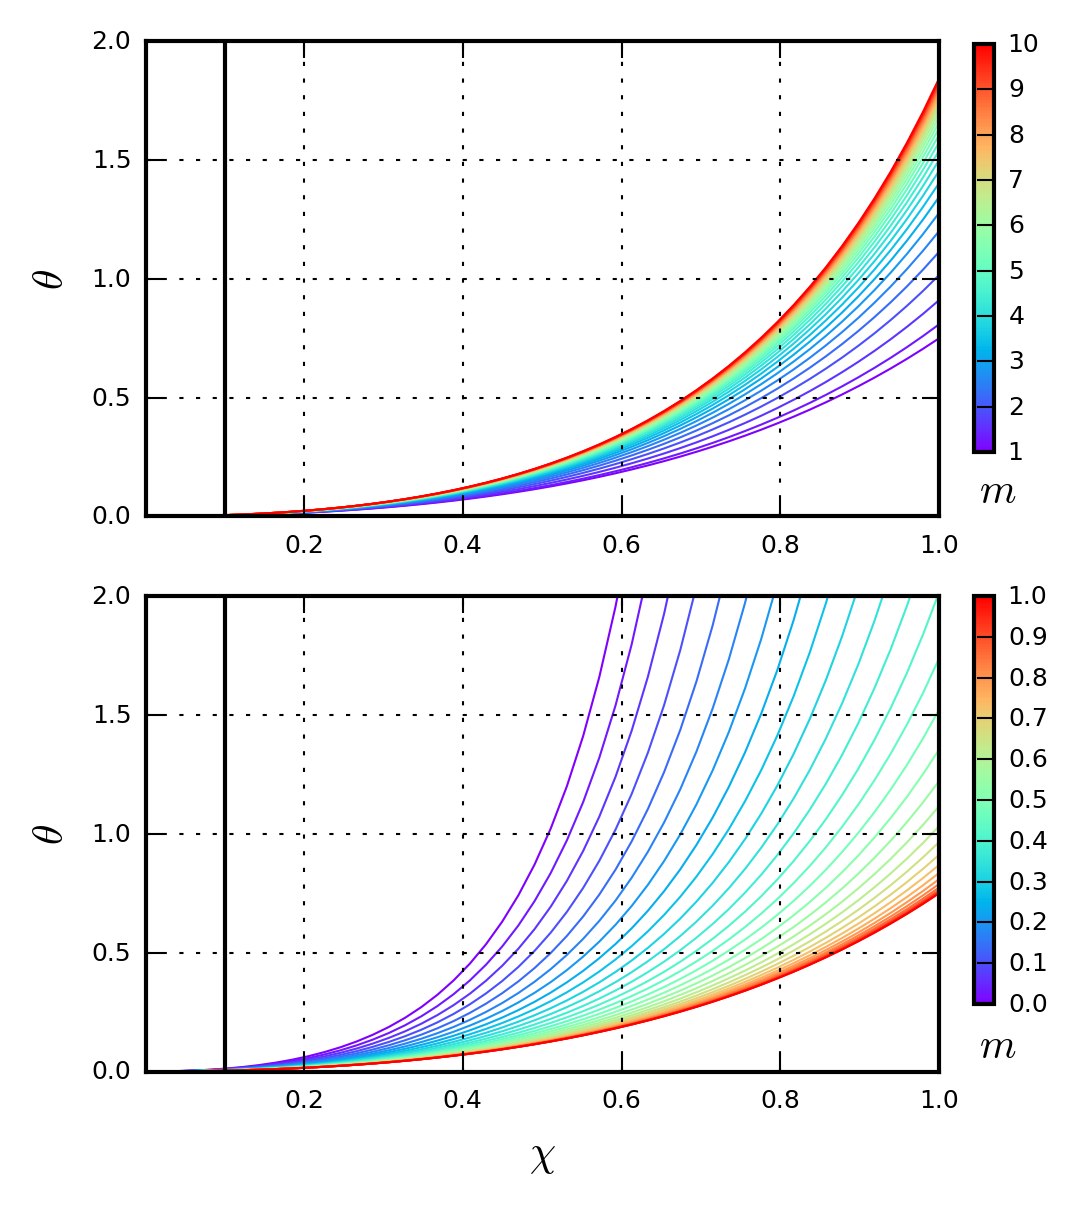

In [32]:
fig = plt.figure(figsize=(3.27, 4))

# Set the line colors
colors = get_cmap('rainbow')

plt.subplot(2, 1, 1)

for t, mpn in zip(theta_prolate, m_prolate_norm):
    plt.plot(k, t, '-k', linewidth=0.5, color=colors(mpn))
plt.plot([0.1, 0.1], [0., 10.], '-k')
plt.ylabel('$\\theta$', fontsize=10)
#plt.xlabel('$\chi$', fontsize=10)
plt.xlim(k.min(), k.max())
plt.ylim(0., 2.)
plt.grid()
plt.annotate('$m$', xy = (1.05, 0.03), xycoords = 'axes fraction', fontsize=10)

norm = Normalize(vmin = 1., vmax = 10.)
ax = fig.add_axes([0.99, 0.625, 0.02, 0.34], adjustable='box-forced')
cb = ColorbarBase(ax, cmap=colors, norm=norm, orientation = 'vertical')

plt.subplot(2, 1, 2)

for t, mpn in zip(theta_oblate, m_oblate_norm):
    plt.plot(k, t, '-k', linewidth=0.5, color=colors(mpn))
plt.plot([0.1, 0.1], [0., 10.], '-k')
plt.ylabel('$\\theta$', fontsize=10)
plt.xlabel('$\chi$', fontsize=10)
plt.xlim(k.min(), k.max())
plt.ylim(0., 2.)
plt.grid()
plt.annotate('$m$', xy = (1.05, 0.03), xycoords = 'axes fraction', fontsize=10)

norm = Normalize(vmin = 0., vmax = 1.)
ax = fig.add_axes([0.99, 0.165, 0.02, 0.34], adjustable='box-forced')
cb = ColorbarBase(ax, cmap=colors, norm=norm, orientation = 'vertical')

#norm = Normalize(vmin = 0., vmax = m_prolate.max())
#ax = fig.add_axes([0.1, -0.05, 0.8, 0.03], adjustable='datalim')
#cb = ColorbarBase(ax, cmap=colors, norm=norm, orientation = 'horizontal')
#cb.set_label('$m$', fontsize=10)

plt.tight_layout()
plt.savefig('..\\manuscript\\figures\\chi_prolate_oblate.pdf', facecolor='w', bbox_inches='tight')
plt.show()